In [1]:
# import the libraries top use
#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Step 1: Problem statement and data collection

We can see the data information in the page <https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv> where each feature is:

1. Pregnancies. Number of pregnancies of the patient (numeric)
2. Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
3. BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
4. SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
5. Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
6. BMI. Body mass index (numeric)
7. DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
8. Age. Age of patient (numeric)
9. Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [2]:
from src.utils import load_data, ReadCsvParams, SaveCsvParams

file_path = '../data/raw/diabetes.csv'
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
read_csv_params: ReadCsvParams = {'delimiter': ','}
save_csv_params: SaveCsvParams = {'sep': ','}

df: pd.DataFrame = load_data(
    file_path=file_path, url=url, read_csv_params=read_csv_params, save_csv_params=save_csv_params
)

Loading data from file: ../data/raw/diabetes.csv


The goal is to predict, based on diagnostic measures, whether a patient has diabetes.

## Problem to solve:
Calculate, based on the physiological data of its customers, what will be the premium (cost) to be borne by someone. Construct a Linear Regression model to predict the cost of a person to be ensured.

# Step 2: Exploration and data cleaning

## Dataframe information

Let's see how is the data, the info and a little of its distribution.

In [3]:
# head of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# tail of the dataframe
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# describe the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Cols for the different types of data

In [7]:
# numerical columns
numerical_cols: list[str] = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                             'DiabetesPedigreeFunction', 'Age']

# categorical columns
categorical_cols: list[str] = ['Outcome']

# features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
            'Age']

# target variable
target: str = 'Outcome'

## Eliminate duplicates

This could be done here, or in the feature engineering step.

We do not have a column to verify duplicates (id column) so we cannot delete duplicates.

## Eliminate irrelevant information

This could be done here, or in the feature engineering step.

We are going to use all the variables.

# Step 3: Analysis of uni variate variables

A **uni variate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

## Analysis of categorical variables

A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

**To represent these types of variables we will use histograms.**

In [8]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['Outcome']
Amount of categorical columns: 1


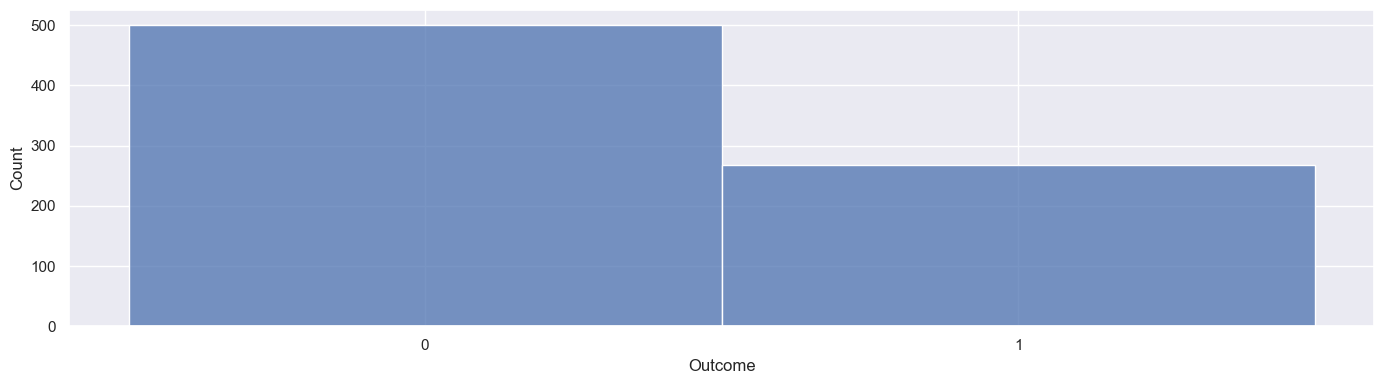

In [9]:
fig, axis = plt.subplots(1, 1, figsize=(14, 4))

"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(data=df, x="Outcome", discrete=True)

# set the x-axis ticks to 0 and 1
plt.xticks([0, 1])

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

The only categorical data is the target data, and we can see that it is bias to the 0 value (people without diabetes).

## Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable. 

**They are usually represented using a histogram and a boxplot, displayed together.**

In [10]:
# let's remember the categorical data
print(f'Categorical columns: {numerical_cols}')
print(f'Amount of categorical columns: {len(numerical_cols)}')

Categorical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Amount of categorical columns: 8


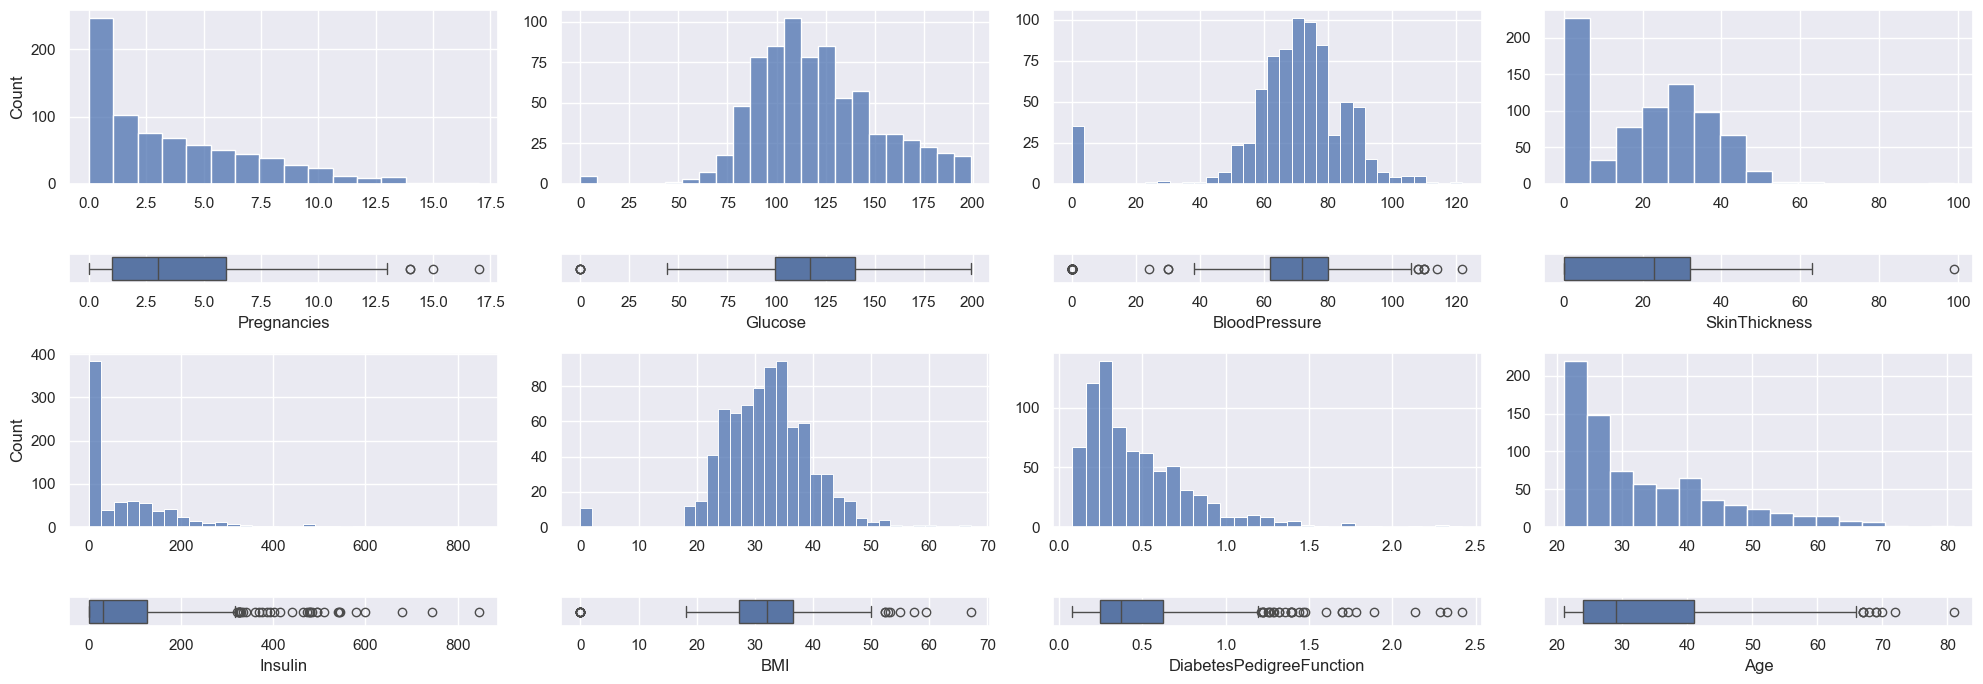

In [11]:
_, axis = plt.subplots(4, 4, figsize=(20, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

"""
Create histograms and box-plots for each numerical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Pregnancies")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Glucose")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="BloodPressure").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="BloodPressure")
# 	forth col
sns.histplot(ax=axis[0, 3], data=df, x="SkinThickness").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x="SkinThickness")

# second row
# 	 col
sns.histplot(ax=axis[2, 0], data=df, x="Insulin").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="Insulin")
# 	second col
sns.histplot(ax=axis[2, 1], data=df, x="BMI").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="BMI")
# 	third col
sns.histplot(ax=axis[2, 2], data=df, x="DiabetesPedigreeFunction").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=df, x="DiabetesPedigreeFunction")
# 	forth col
sns.histplot(ax=axis[2, 3], data=df, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 3], data=df, x="Age")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

Do the breakdown of the distribution and skewness for each variable:

**1. Pregnancies**

* **Histogram:** The distribution is heavily right-skewed, with most values concentrated at the lower end and a long tail extending towards higher pregnancy counts.
* **Box Plot:** The box plot confirms the strong right skew and indicates some outliers at higher pregnancy counts.
* **Distribution:** Not normally distributed. It's a highly skewed discrete distribution.
* **Skewness:** Strongly right-skewed (positive skew).

**2. Glucose**

* **Histogram:** The distribution is somewhat bimodal or multimodal, with peaks in the lower and higher glucose ranges. It's not a perfectly symmetrical bell shape.
* **Box Plot:** The box plot shows a slight right skew.
* **Distribution:** Not normally distributed. It's multimodal with a slight positive skew.
* **Skewness:** Slightly right-skewed (positive skew).

**3. Blood Pressure**

* **Histogram:** The distribution appears to be somewhat multimodal with several peaks and no clear bell shape.
* **Box Plot:** The box plot indicates a relatively symmetrical distribution with a few potential outliers on the lower and higher ends.
* **Distribution:** Not normally distributed. It's multimodal or uniform.
* **Skewness:** Slightly right-skewed (positive skew).

**4. Skin Thickness**

* **Histogram:** The distribution is right-skewed, with most values concentrated at the lower end and a tail extending towards higher skin thickness values.
* **Box Plot:** The box plot confirms the right skew and shows some outliers at higher skin thickness values.
* **Distribution:** Not normally distributed. It's a right-skewed distribution.
* **Skewness:** Right-skewed (positive skew).

**5. Insulin**

* **Histogram:** The distribution is heavily right-skewed, with most values concentrated at the lower end and a very long tail extending to higher insulin values.
* **Box Plot:** The box plot confirms the strong right skew and shows many outliers at higher insulin values.
* **Distribution:** Not normally distributed. It's a highly skewed distribution.
* **Skewness:** Strongly right-skewed (positive skew).

**6. BMI (Body Mass Index)**

* **Histogram:** The distribution is somewhat bell-shaped but not perfectly symmetrical. It has a slight tail towards higher BMI values.
* **Box Plot:** The box plot shows a slight right skew with a few potential outliers at the higher end.
* **Distribution:** Approximates a normal distribution but with a slight positive skew.
* **Skewness:** Slightly right-skewed (positive skew).

**7. Diabetes Pedigree Function**

* **Histogram:** The distribution is heavily right-skewed, with most values concentrated at the lower end and a long tail extending to higher values.
* **Box Plot:** The box plot confirms the strong right skew and shows several outliers at higher values.
* **Distribution:** Not normally distributed. It's a highly skewed distribution.
* **Skewness:** Strongly right-skewed (positive skew).

**8. Age**

* **Histogram:** The distribution is right-skewed, with most values concentrated at the lower end and a tail extending towards higher age values.
* **Box Plot:** The box plot confirms the right skew and shows a few outliers at higher age values.
* **Distribution:** Not normally distributed. It's a right-skewed distribution.
* **Skewness:** Right-skewed (positive skew).


# Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable Cabin has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.

## Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. 

**Scatter-plots and correlation analysis are used to compare two numerical columns.**

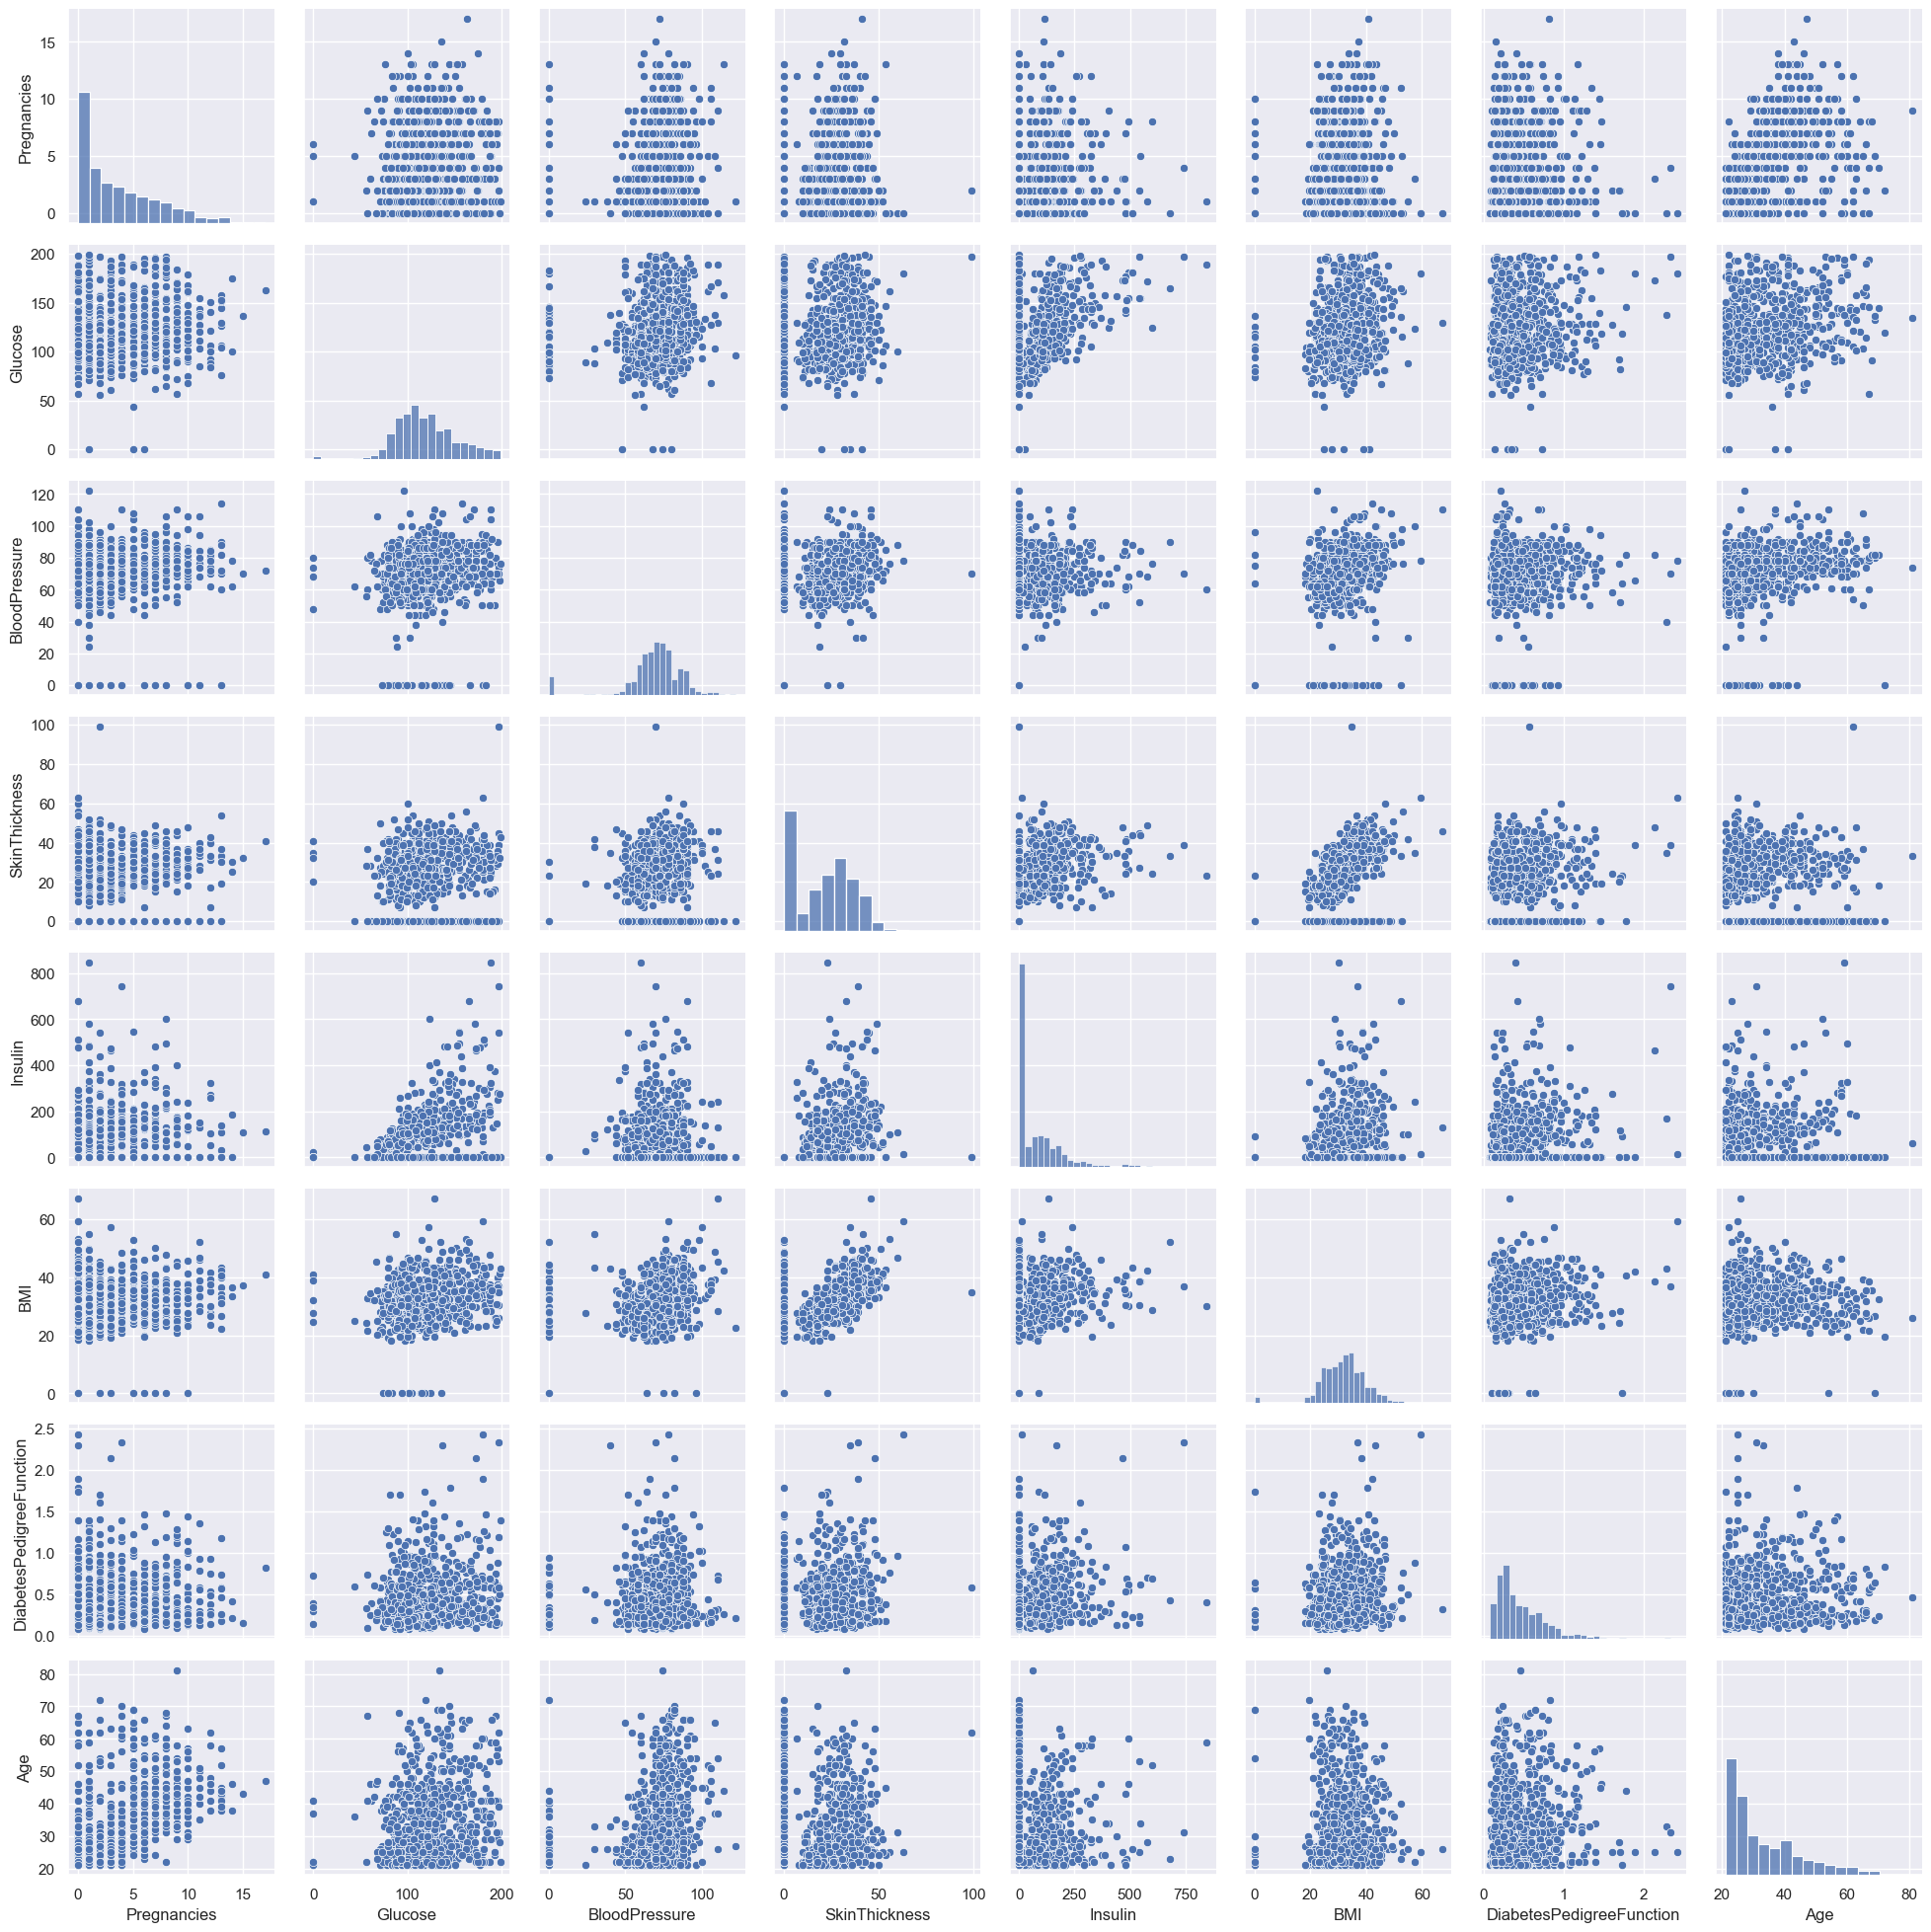

In [12]:
# graphs of numerical vs numerical with histograms and scatter plots
g = sns.PairGrid(df[numerical_cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

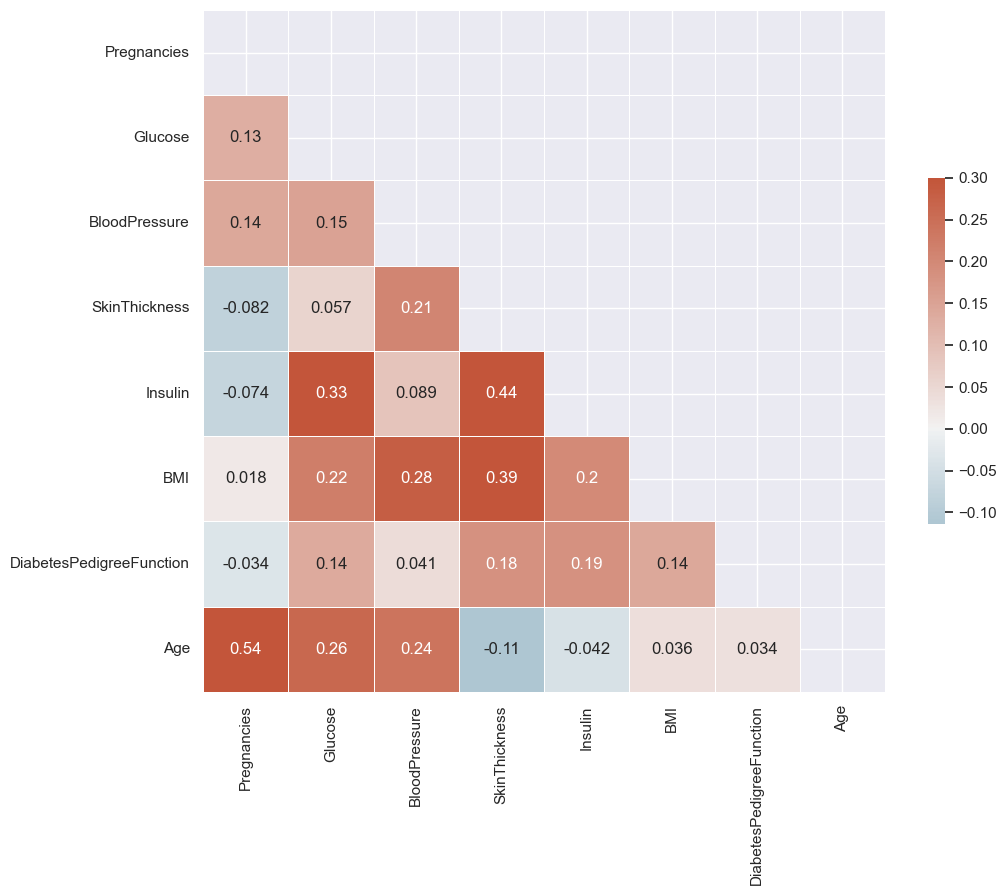

In [13]:
from src.draw_utils import draw_corr_matrix

# compute the correlation matrix of the numerical columns
corr = df[numerical_cols].corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Analysis

Some variables have high correlation between them. The higher corr in the matrix is 0.54

## Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. 

**Histograms and combinations are used to compare two categorical columns.**

### Factorize the dataframe

We do not have to do this, the data is already in factorize.

### Combinations of class with various predictors

In [14]:
# let's remember the numerical data
print(f'Numerical columns: {numerical_cols}')
print(f'Amount of numerical columns: {len(numerical_cols)}')

Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Amount of numerical columns: 8


In [15]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['Outcome']
Amount of categorical columns: 1


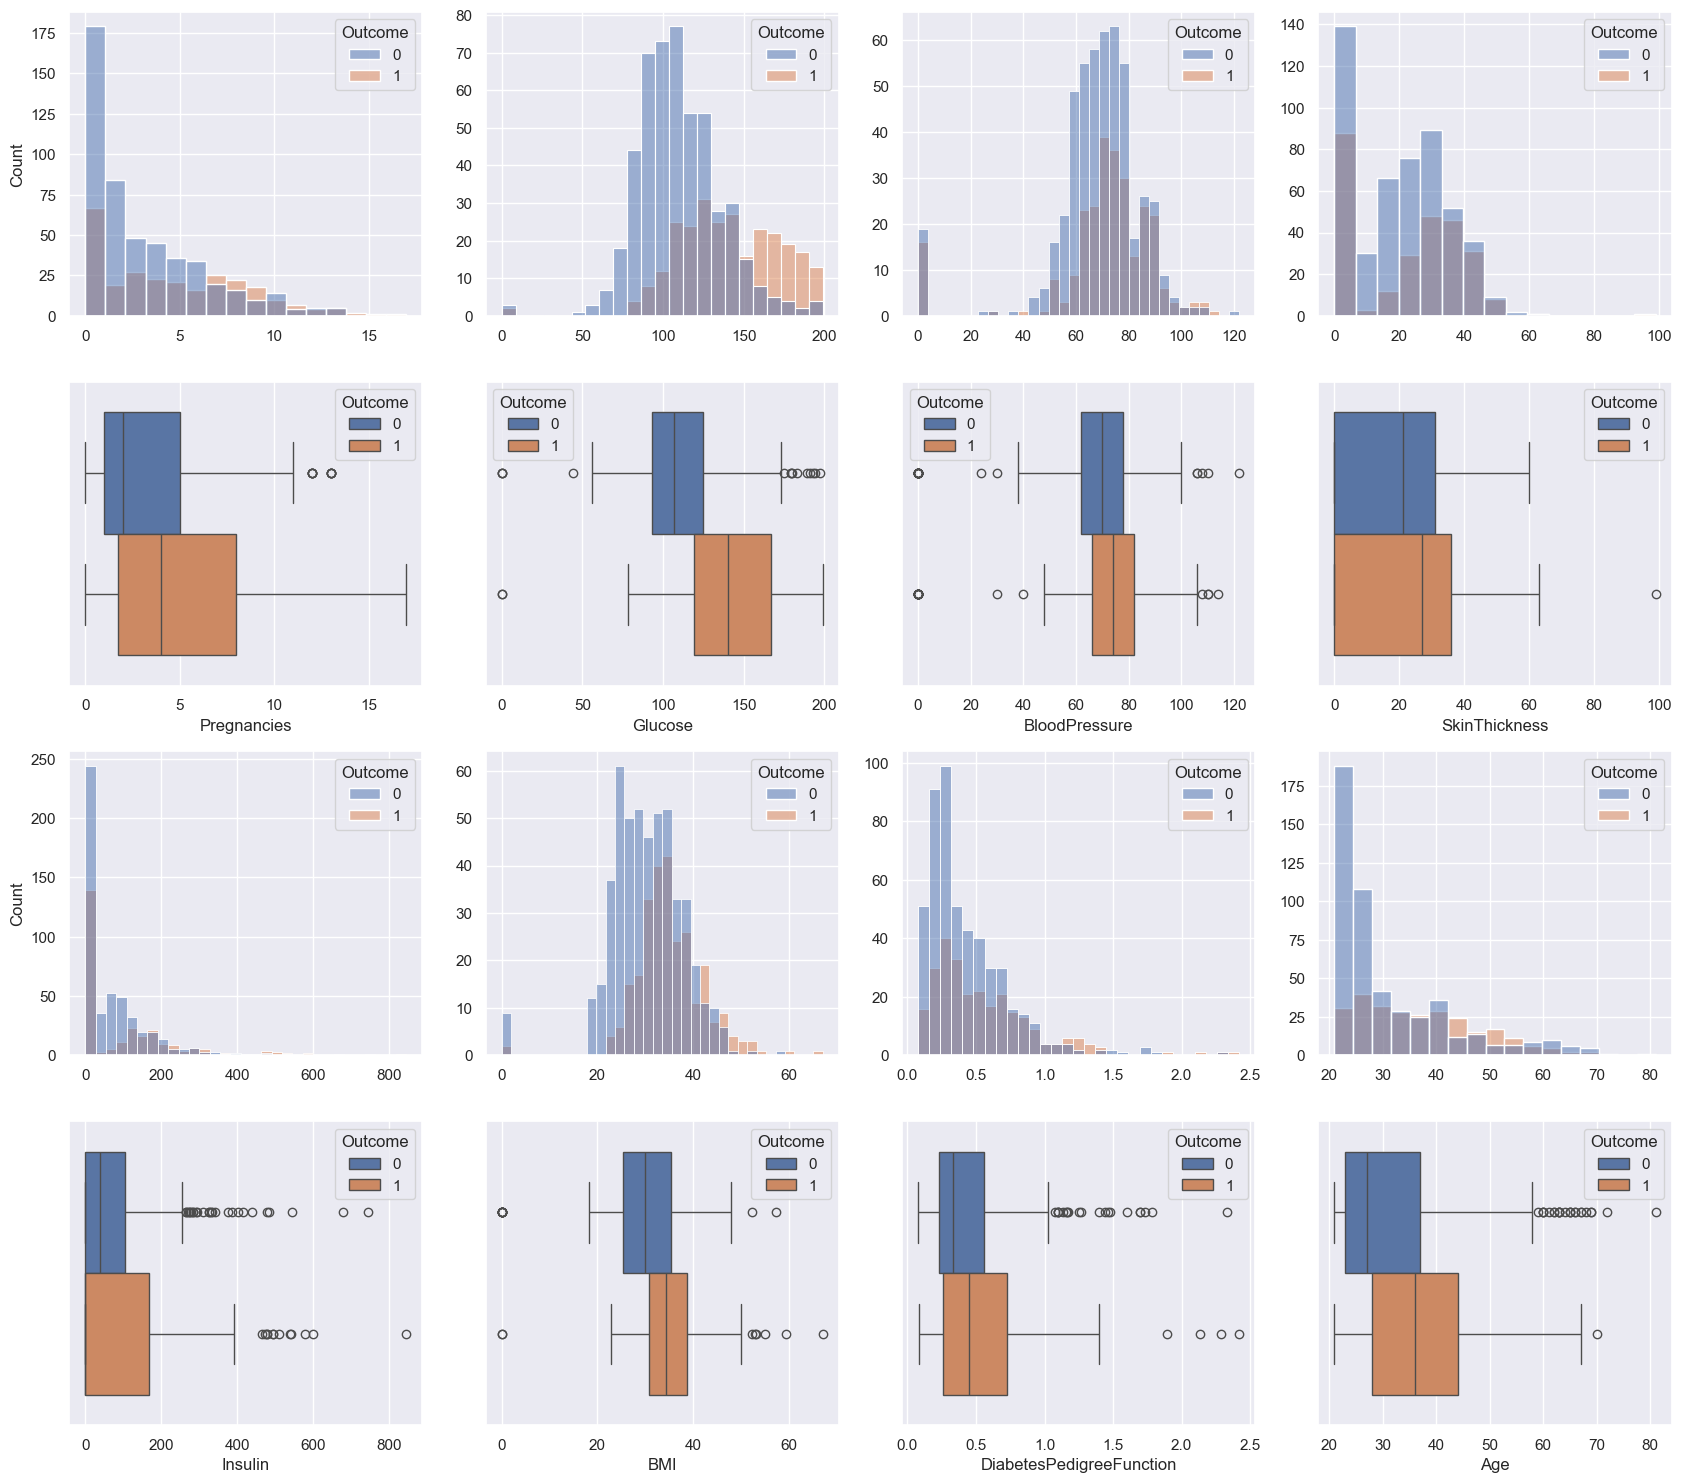

In [16]:
_, axis = plt.subplots(4, 4, figsize=(17, 15))
#
"""
Create histograms for each numerical feature with categorical columns as hues.
"""

# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies", hue=target).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Pregnancies", hue=target)
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="Glucose", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Glucose", hue=target)
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="BloodPressure", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="BloodPressure", hue=target)
# 	forth col
sns.histplot(ax=axis[0, 3], data=df, x="SkinThickness", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x="SkinThickness", hue=target)

# second row
# 	first col
sns.histplot(ax=axis[2, 0], data=df, x="Insulin", hue=target).set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="Insulin", hue=target)
# 	second col
sns.histplot(ax=axis[2, 1], data=df, x="BMI", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="BMI", hue=target)
# 	third col
sns.histplot(ax=axis[2, 2], data=df, x="DiabetesPedigreeFunction", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=df, x="DiabetesPedigreeFunction", hue=target)
# 	forth col
sns.histplot(ax=axis[2, 3], data=df, x="Age", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 3], data=df, x="Age", hue=target)

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

We cannot get a conclusion from the info in the graphs, but we can see that in the **Glucose** graph the people with diabetes have higher values of Glucose. The same relationship can be seen in the **BMI** variable but in a smaller relation.

## Numerical-categorical analysis (complete)

Now do the analysis of the numerical vs categorical variables (factorized).

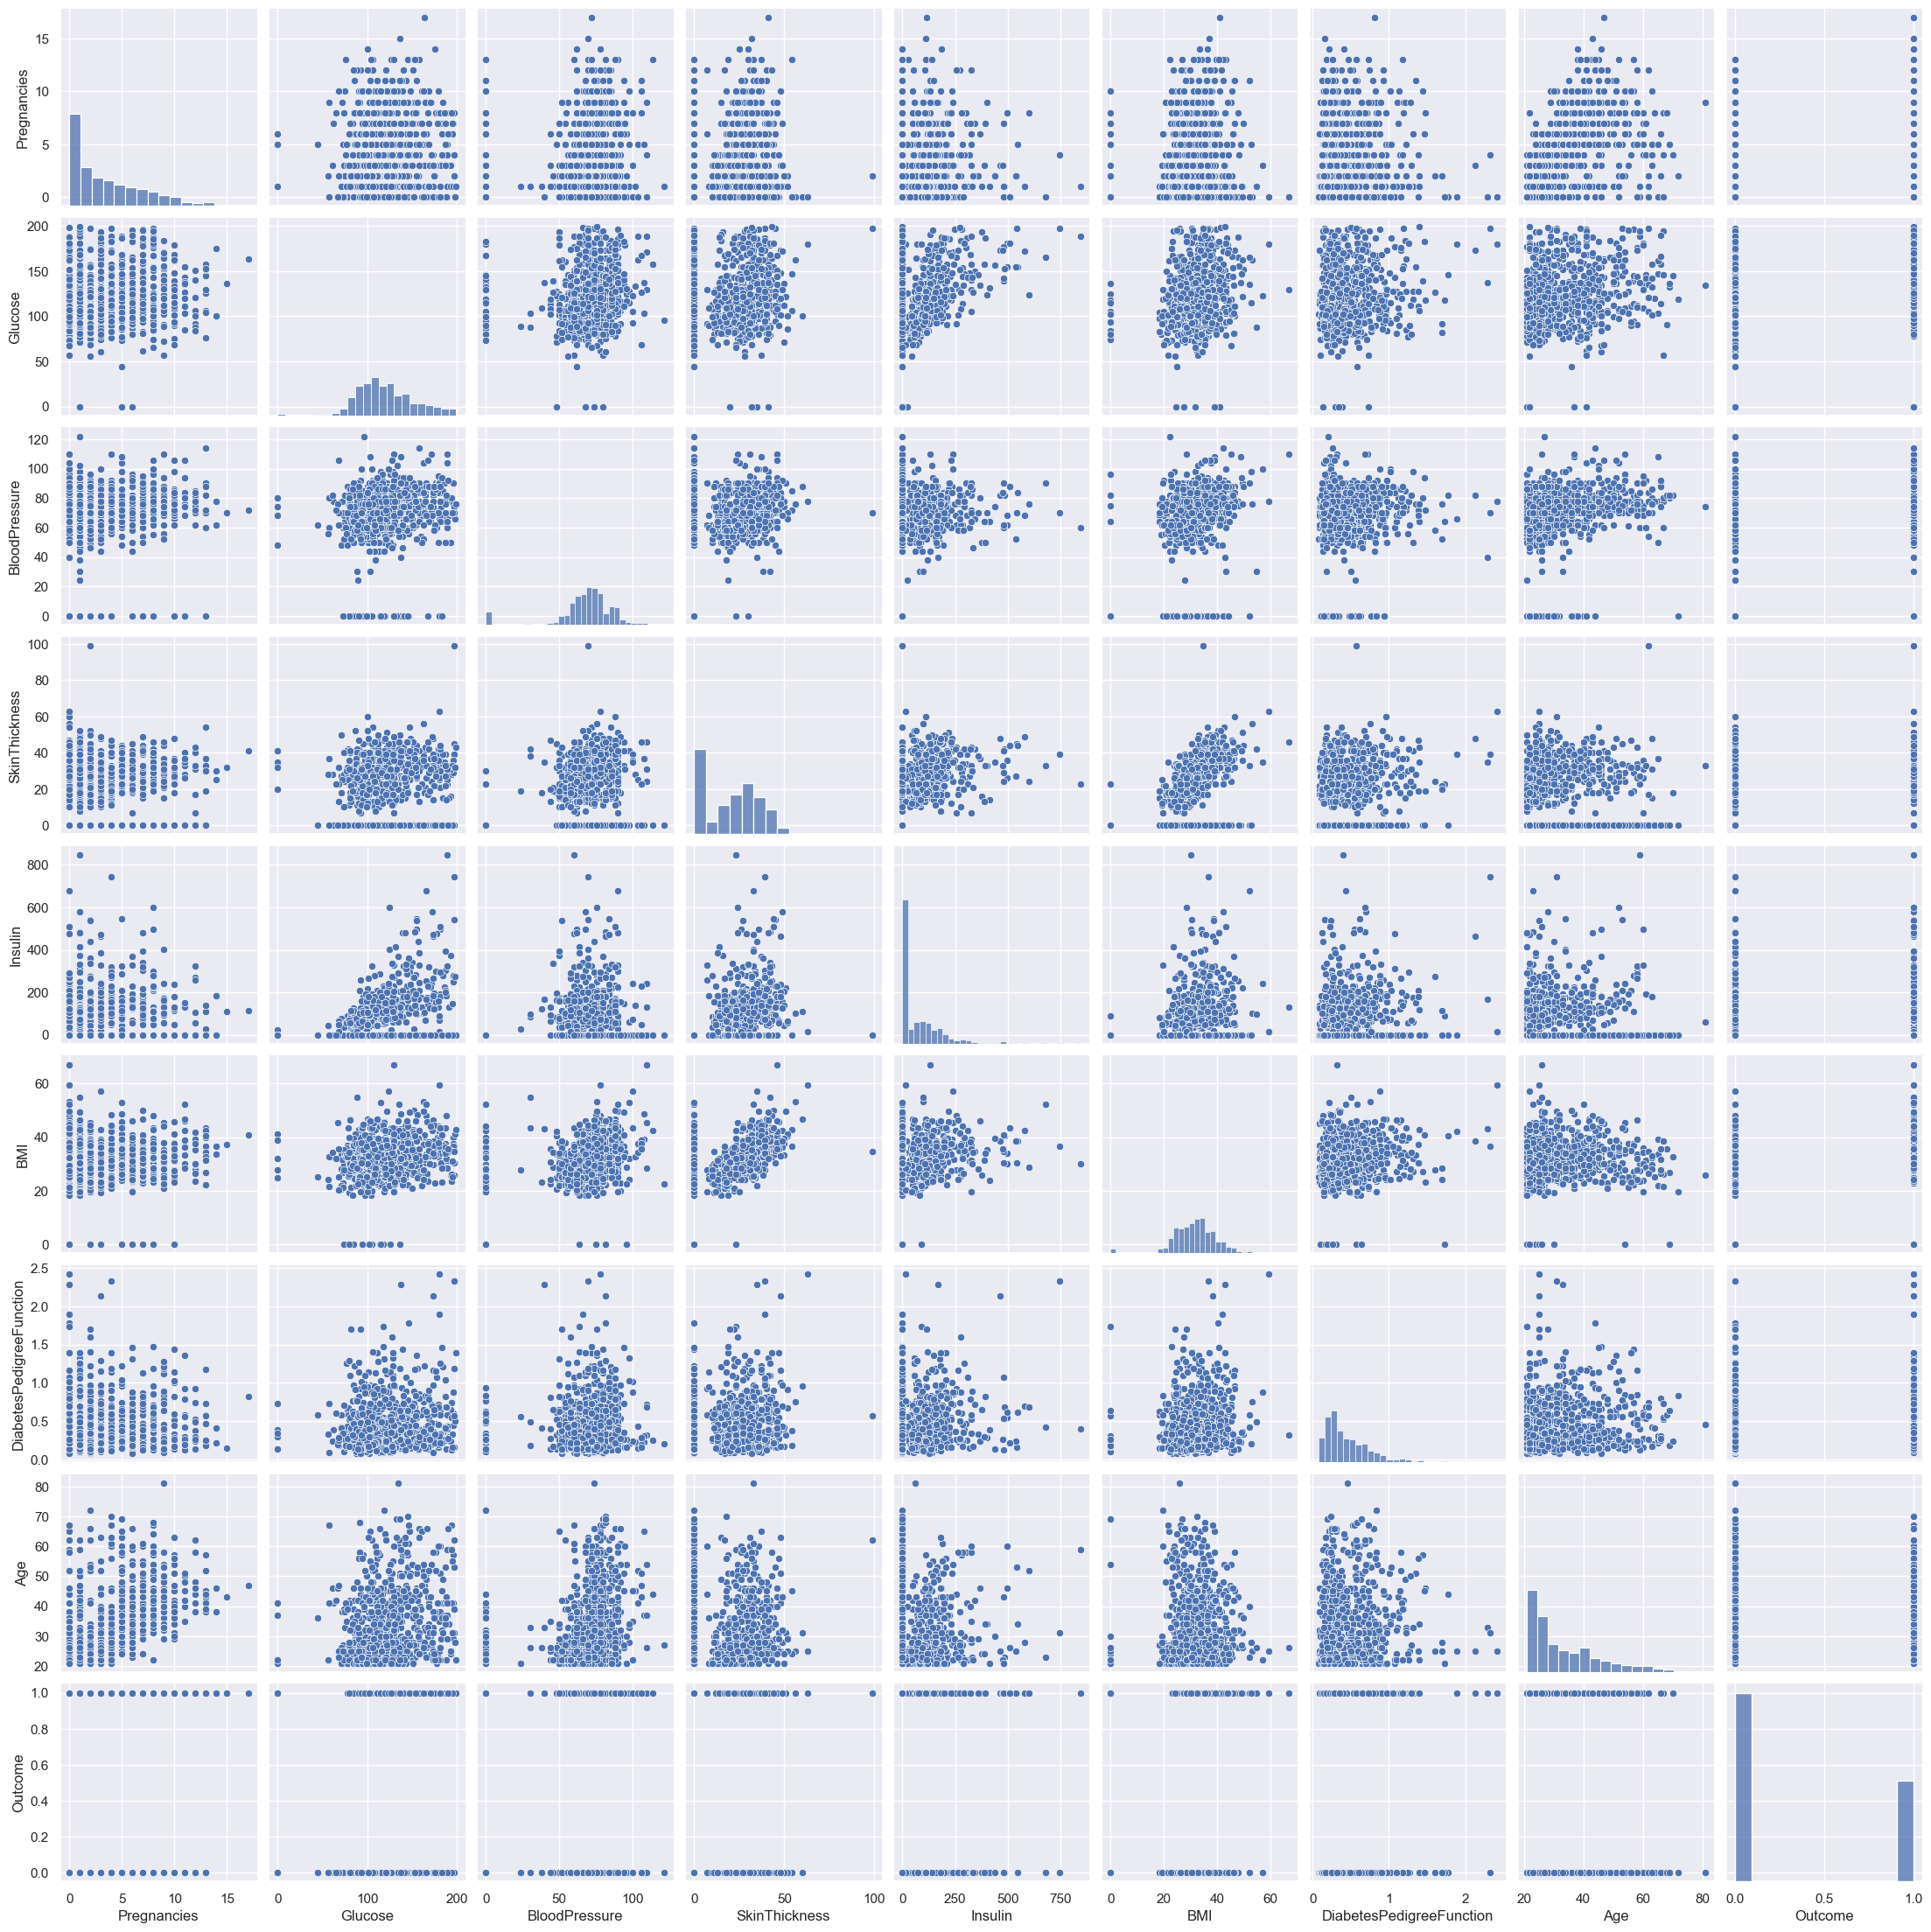

In [17]:
# pair-plot of all the data
sns.pairplot(data=df)

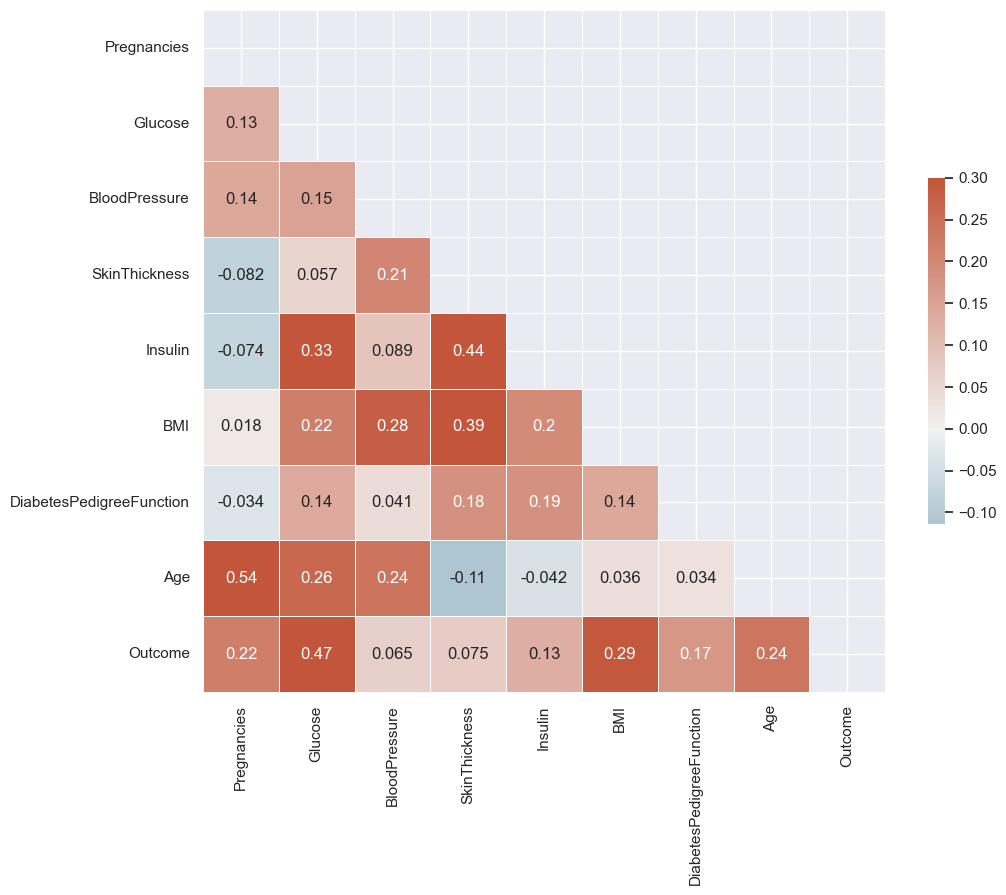

In [18]:
# compute the correlation matrix of all the data
corr = df.corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Conclusion

We can see that the variables that have the stronger correlation with the target **Outcome** are:

Positive correlation:
1. Glucose (we were able to see this in the plots with different predictors)
2. BMI
3. AGE
4. Pregnancies

Negative correlation: no variables have negative correlation with the target variable.

# Step 5: Feature engineering

***Feature engineering*** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

Although this could have been done in this step as it is part of the feature engineering, it is usually done before analyzing the variables, separating this process into a previous one and the one we are going to see next.

## Missing value analysis

A **missing** value is a space that has no value assigned to it in the observation of a specific variable. These types of values are quite common and can arise for many reasons. For example, there could be an error in data collection, someone may have refused to answer a question in a survey, or it could simply be that certain information is not available or not applicable.

### Treating Missing Values in Pandas DataFrames

Treating missing values in a variable within a Pandas DataFrame is a crucial step in data preprocessing. Here's a breakdown of common methods and when to use them:

**1. Removing Rows or Columns:**

* **Method:** Delete rows or columns containing missing values.
* **When to use:**
    * When missing values are a small percentage of the dataset.
    * When you're confident that removing the missing values won't introduce significant bias.
    * When a column has a very large number of missing values.
* **Caution:**
    * Can lead to significant data loss, especially if missing values are widespread.
    * May introduce bias if missing values are not randomly distributed.


**2. Imputation:**

* **Method:** Replace missing values with estimated values.
* **Common Imputation Methods:**
    * **Mean Imputation:** Replace missing values with the mean of the column.
    * **Median Imputation:** Replace missing values with the median of the column. (Robust to outliers)
    * **Mode Imputation:** Replace missing values with the mode (most frequent value) of the column. (For categorical data)
    * **Forward Fill:** Propagate the last valid observation forward.
    * **Backward Fill:** Propagate the next valid observation backward.
    * **Interpolation:** Estimate missing values based on surrounding values.
    * **Predictive Imputation:** Use machine learning models to predict missing values.
* **When to use:**
    * When you want to preserve the data and avoid data loss.
    * When missing values are likely due to random factors.
    * When you have time series data and the forward/backward fill make sense.
* **Caution:**
    * Can introduce bias if imputed values are not accurate.
    * Reduces variability in the data.
    * Using the mean can be heavily influenced by outliers.


**3. Creating a Missing Value Indicator:**

* **Method:** Create a new binary column indicating whether a value is missing or not.
* **When to use:**
    * When the fact that a value is missing is itself informative.
    * When you want to preserve the missing information for your model.
* **Caution:**
    * Adds a new feature to your dataset.
    * May not be necessary if missing values are completely random.


**Choosing the Right Method:**

* Analyze the nature of missing values: Are they random or systematic?
* Consider the percentage of missing values: If it's high, imputation might be necessary.
* Think about the impact on your model: Some models can handle missing values better than others.
* Use domain knowledge: Your understanding of the data can guide your decision.
* Experiment: Try different methods and evaluate their impact on your analysis.

In [19]:
# verify non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**No work needed**

## Outlier analysis

An outlier is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

Descriptive analysis is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The describe() function of a DataFrame helps us to calculate in a very short time all these values.

In [20]:
# verify the distribution again, we are not going to work in the outliers this time
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Treating Outliers in Pandas DataFrames

There are several ways to treat outliers in a variable within a Pandas DataFrame. The best approach depends on the nature of your data, the extent of the outliers, and your specific analysis goals. Here's a breakdown of common methods:

**1. Removing Outliers:**

* **Method:** Filter out rows containing outliers based on a defined threshold.
* **When to use:**
    * When you're confident that the outliers are due to errors or anomalies.
    * When you have a large dataset and removing a few outliers won't significantly impact your analysis.
    * When you want to prevent outliers from skewing statistical measures.
* **Caution:**
    * Can lead to data loss.
    * May introduce bias if outliers are not random.


**2. Capping/Flooring Outliers:**

* **Method:** Replace outlier values with a predefined upper or lower limit.
* **When to use:**
    * When you want to preserve the data but reduce the impact of outliers.
    * When outliers are likely due to extreme but valid values.
* **Caution:**
    * Can distort the distribution of the data.
    * Requires careful selection of capping/flooring limits.


**3. Transforming Outliers:**

* **Method:** Apply mathematical transformations (e.g., log, square root, Box-Cox) to reduce the skewness caused by outliers.
* **When to use:**
    * When outliers are causing significant skewness in the data.
    * When your model assumes a normal distribution.
* **Caution:**
    * Can make data interpretation more complex.
    * Requires careful selection of transformation methods.


**4. Imputing Outliers:**

* **Method:** Replace outliers with estimated values (e.g., mean, median).
* **When to use:**
    * When you want to preserve the data and avoid data loss.
    * When the outliers are probably errors.
* **Caution:**
    * Can introduce bias if imputed values are not accurate.
    * Reduces variability in the data.

**5. Using Robust Scalers:**

* **Method:** Use scaling techniques that are less sensitive to outliers (e.g., `RobustScaler` from scikit-learn).
* **When to use:**
    * When you want to scale the data without removing or capping outliers.
    * When using models that are sensitive to feature scaling.
* **Caution:**
    * Doesn't remove or modify outliers; it only scales them.

**Choosing the Right Method:**

* Visualize your data: Use box plots, histograms, and scatter plots to identify outliers.
* Consider your model: Some models are more sensitive to outliers than others.
* Domain knowledge: Use your understanding of the data to determine the best approach.
* Experiment: Try different methods and evaluate their impact on your analysis.

This time we are going to treat the outliers in the Insulin, BMI and DiabetesPedigreeFunction variables, to see i we can get better results. And the majority of the outliers are in the label 0, so it seems that it might not affect the ability of the model to predict the positive labels.

In [21]:
import numpy as np
from pprint import pprint

columns = ['Insulin', 'BMI', 'DiabetesPedigreeFunction']
outlier_info = {}

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 10)
    Q3 = np.percentile(column_data, 90)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # new dict for the column
    outlier_info[column] = {}

    # sat the data for the column
    outlier_info[column]['Q1'] = Q1
    outlier_info[column]['Q3'] = Q3
    outlier_info[column]['lower'] = lower
    outlier_info[column]['upper'] = upper
    outlier_info[column]['IQR'] = IQR
    outlier_info[column]['outliers'] = column_data[(column_data < lower) | (column_data > upper)].tolist()
    outlier_info[column]['percentage'] = len(outlier_info[column]['outliers']) / len(column_data) * 100

pprint(outlier_info, compact=True)

{'BMI': {'IQR': np.float64(17.9),
         'Q1': np.float64(23.6),
         'Q3': np.float64(41.5),
         'lower': np.float64(-3.2499999999999964),
         'outliers': [],
         'percentage': 0.0,
         'upper': np.float64(68.35)},
 'DiabetesPedigreeFunction': {'IQR': np.float64(0.7136000000000001),
                              'Q1': np.float64(0.165),
                              'Q3': np.float64(0.8786000000000002),
                              'lower': np.float64(-0.9054000000000002),
                              'outliers': [2.288, 2.329, 2.137, 2.42],
                              'percentage': 0.5208333333333333,
                              'upper': np.float64(1.9490000000000003)},
 'Insulin': {'IQR': np.float64(210.0),
             'Q1': np.float64(0.0),
             'Q3': np.float64(210.0),
             'lower': np.float64(-315.0),
             'outliers': [543, 846, 744, 680, 545, 579, 600, 540],
             'percentage': 1.0416666666666665,
             'uppe

We can see that the percentages of outliers are small so we are going to use the winsorize technic

In [22]:
from scipy.stats.mstats import winsorize

win_df = df.copy()

for key in outlier_info.keys():
    # data on teh column
    column_data = df[key]

    # set the new values
    win_df[key] = winsorize(column_data, limits=[0.1, 0.1])


In [23]:
win_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.6,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,41.5,0.880,33,1


In [24]:
win_df.describe()

F:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
F:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
F:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
F:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
F:\SoftwareInstalls\Anaconda\envs\ds_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
F:\SoftwareInstalls\Anaconda\envs\d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,66.295573,32.076172,0.441533,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,77.498235,5.754195,0.237436,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.600000,0.165000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,210.000000,41.500000,0.880000,81.000000,1.000000


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


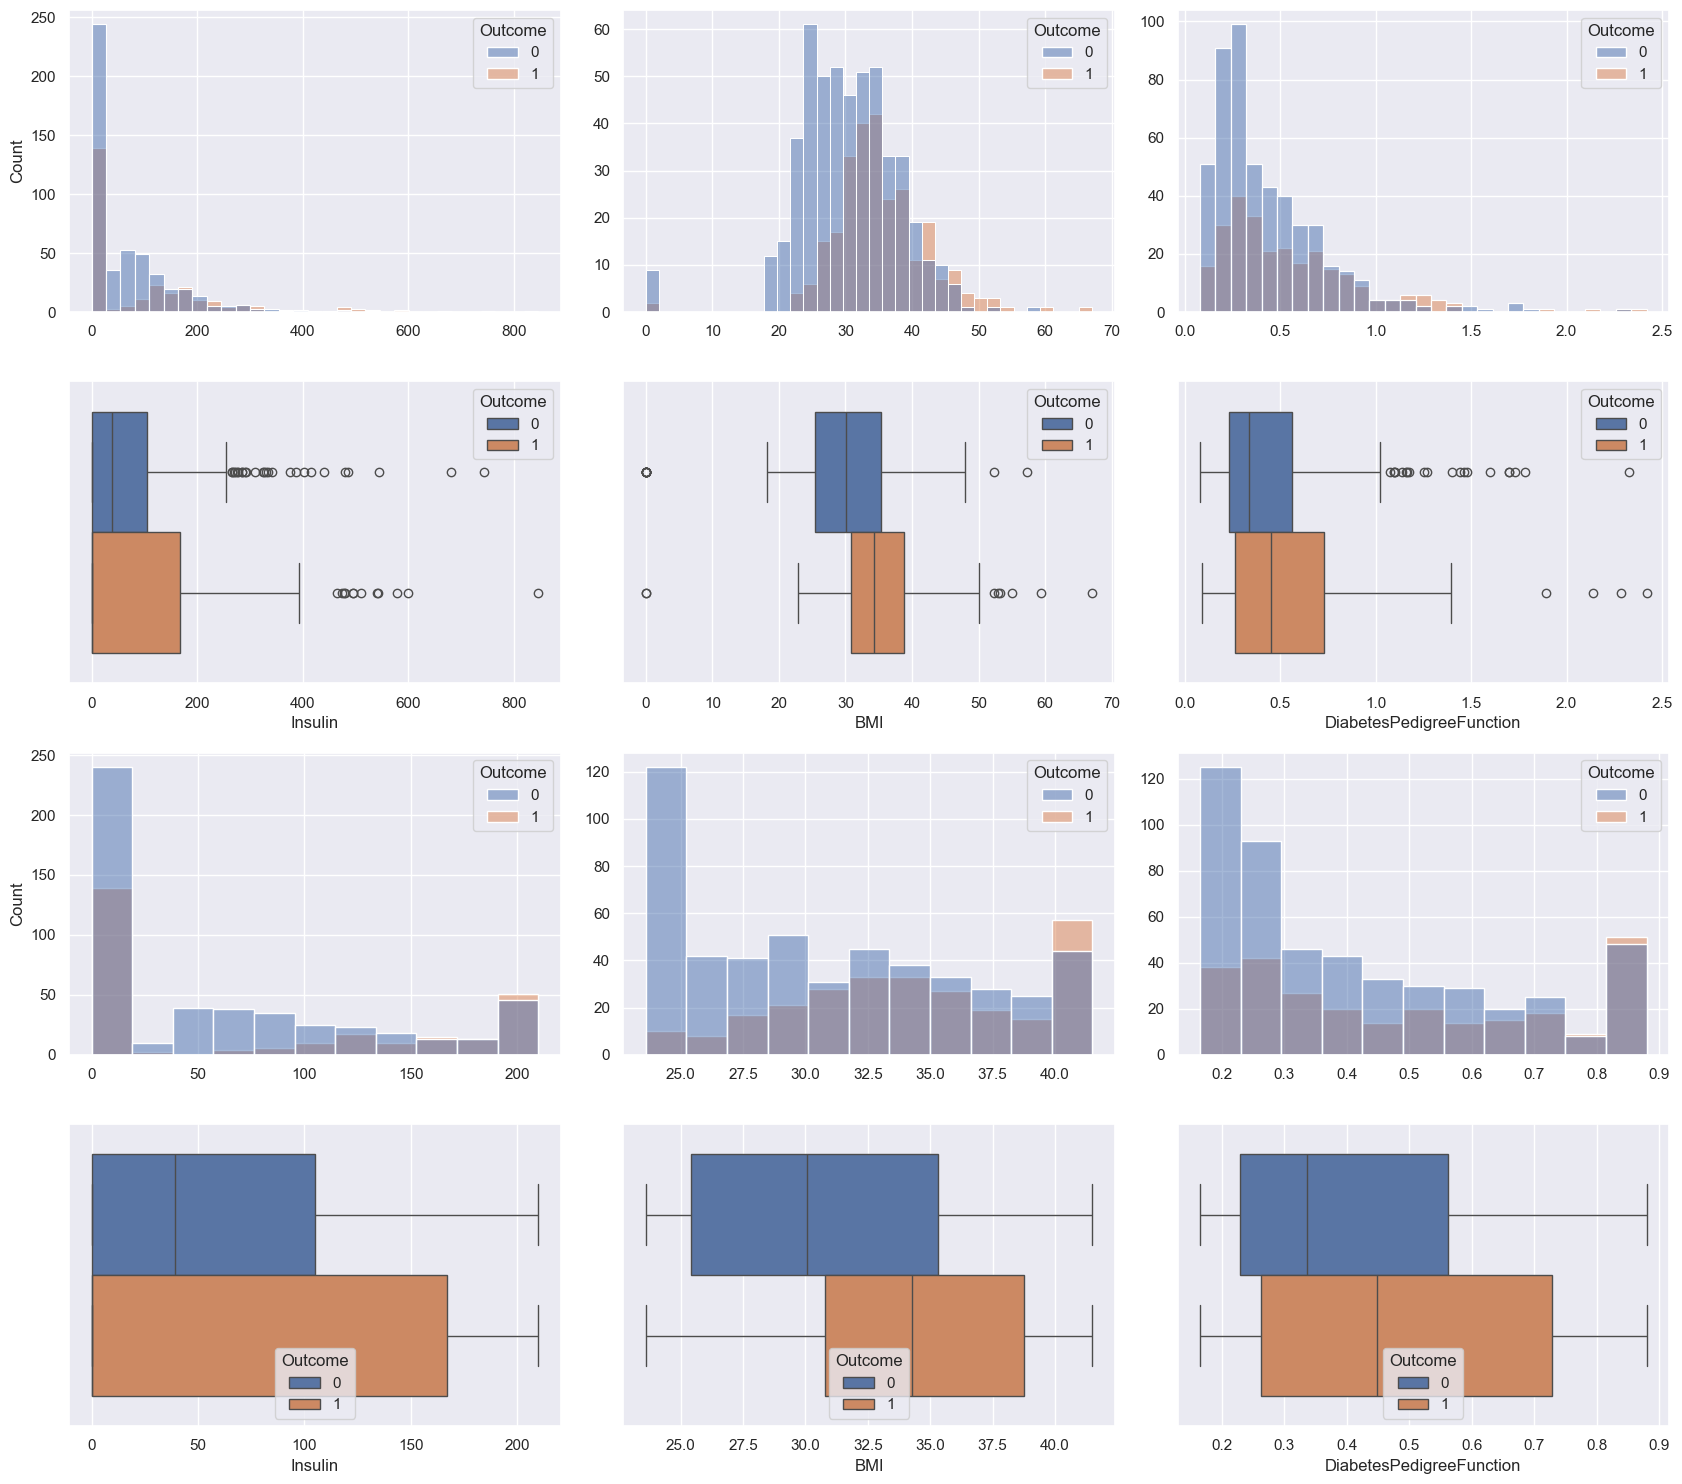

In [26]:
_, axis = plt.subplots(4, 3, figsize=(17, 15))
#
"""
Create histograms for each numerical feature with categorical columns as hues.
"""

# first row
# 	col
sns.histplot(ax=axis[0, 0], data=df, x="Insulin", hue=target).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Insulin", hue=target)
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="BMI", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="BMI", hue=target)
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="DiabetesPedigreeFunction", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="DiabetesPedigreeFunction", hue=target)

# second row
# 	first col
sns.histplot(ax=axis[2, 0], data=win_df, x="Insulin", hue=target).set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=win_df, x="Insulin", hue=target)
# 	second col
sns.histplot(ax=axis[2, 1], data=win_df, x="BMI", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=win_df, x="BMI", hue=target)
# 	third col
sns.histplot(ax=axis[2, 2], data=win_df, x="DiabetesPedigreeFunction", hue=target).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=win_df, x="DiabetesPedigreeFunction", hue=target)

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

In the first two rows of the plot we can see the original data and int the last two the winsorized data. We can see that we got a much better representation of the data without the outliers.

In [27]:
# set the df to the winsorized data for further processing
df = win_df.copy()

## Inference of new features

Another typical use of this engineering is to obtain new features by "merging" two or more existing ones.

**No work is going to be done here**

## Divide the set into train and test,

In [28]:
from src.utils import split_my_data

# set independent and dependent variables
X: pd.DataFrame = df.drop(target, axis=1)
y: pd.Series = df[target]

# divide the dataset into training and test samples
X_train, X_test, y_train, y_test = split_my_data(X, y, test_size=0.2, random_state=42)

## Feature scaling

**Feature scaling** is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other.

### Feature Scaling with Scikit-learn (sklearn)

Scikit-learn (sklearn) provides several tools for feature scaling, each with its own characteristics and use cases. Here's a breakdown:

**1. StandardScaler:**

* **How it works:** Standardizes features by removing the mean and scaling to unit variance.
* **Formula:** `z = (x - u) / s`, where `u` is the mean and `s` is the standard deviation.
* **When to use:**
    * When your data has a Gaussian (normal) distribution, or you want to transform it to resemble a Gaussian distribution.
    * When your model assumes that features are centered around zero and have unit variance (e.g., linear regression, logistic regression, support vector machines).
* **Caution:** Sensitive to outliers.

**2. MinMaxScaler:**

* **How it works:** Scales features to a given range, usually between 0 and 1.
* **Formula:** `x_scaled = (x - x_min) / (x_max - x_min)`
* **When to use:**
    * When you need to keep the values within a specific range.
    * When you don't have many outliers.
    * When using algorithms that are sensitive to the magnitude of features (e.g., neural networks).
* **Caution:** Sensitive to outliers.

**3. RobustScaler:**

* **How it works:** Scales features using statistics that are robust to outliers (median and interquartile range).
* **Formula:** `x_scaled = (x - median) / IQR`, where `IQR` is the interquartile range.
* **When to use:**
    * When your data contains outliers.
    * When you want to reduce the impact of outliers on your scaling.
* **Caution:** Doesn't normalize data to a specific range.

**4. MaxAbsScaler:**

* **How it works:** Scales features by dividing each value by the maximum absolute value.
* **Formula:** `x_scaled = x / abs(x_max)`
* **When to use:**
    * When you have sparse data (data with many zero values).
    * When you want to preserve the sparsity of your data.
    * When you want to scale data to the range [-1, 1].
* **Caution:** Sensitive to outliers in the maximum absolute values.

**5. QuantileTransformer:**

* **How it works:** Transforms features to follow a uniform or normal distribution. It is a non-linear transformation.
* **When to use:**
    * When your data has a non-linear distribution.
    * When you want to reduce the impact of outliers.
    * Can also compress outliers into a smaller interval.
* **Caution:** Distorts correlations and distances.

**6. PowerTransformer:**

* **How it works:** Applies power transformations (Yeo-Johnson or Box-Cox) to make data more Gaussian-like.
* **When to use:**
    * When your data is skewed, and you want to normalize its distribution.
    * When your model assumes a Gaussian distribution.
* **Caution:** Works better for positive data. Box-Cox can only be used with strictly positive data.

**Key Considerations:**

* **Model Requirements:** The choice of scaler often depends on the requirements of your machine learning model. Some models are more sensitive to the scale of features than others.
* **Data Distribution:** Consider the distribution of your data (e.g., Gaussian, skewed, presence of outliers) when choosing a scaler.
* **Outliers:** If your data contains outliers, `RobustScaler` or `QuantileTransformer` are good choices.
* **Range Requirements:** If you need to scale data to a specific range (e.g., [0, 1] or [-1, 1]), use `MinMaxScaler` or `MaxAbsScaler`.
* **Pipelines and ColumnTransformer:** It is highly recommended to use the scikit-learn pipeline, and the ColumnTransformer to properly work with data that have different kind of data into it.

In this case we are not going to scale the data because the model can work with data without scaling.

# Step 6: Feature selection

The feature selection is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest.

There are several reasons to include it in our exploratory analysis:

1. To simplify the model so that it is easier to understand and interpret.
2. To reduce the training time of the model.
3. Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.
4. Improve model performance by removing irrelevant features.
 
In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models. More information is available here.

The sklearn library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is SelectKBest. This function selects the k best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square.

**We are going to use all the variables not work needed**

# Step 7: Save the data

In [29]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train.to_csv(path_or_buf=X_TRAIN_PATH, sep=',', index=False, )
X_test.to_csv(path_or_buf=X_TEST_PATH, sep=',', index=False, )

y_train.to_csv(path_or_buf=Y_TRAIN_PATH, sep=',', index=False, )
y_test.to_csv(path_or_buf=Y_TEST_PATH, sep=',', index=False, )